# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
from HouseholdSpecializationModel import HouseholdSpecializationModelClass
model = HouseholdSpecializationModelClass()


# Question 1

**Explain how you solve the model**

LM = 4.5000
HM = 4.5000
LF = 4.5000
HF = 4.5000
HF: 4.5 for alpha and sigma: (0.5, 1.0)
HM: 4.5 for alpha and sigma: (0.5, 1.0)
The relationship between HF and HM is: 1.0
0.25 0.5


c:\Users\adamk\OneDrive\Skrivebord\UNI\6. Semester\Intro Programming\projects-2023-joost-adam-og-frederik\inauguralproject\HouseholdSpecializationModel.py:63: RuntimeWarning: divide by zero encountered in reciprocal
  (1-par.alpha)*HM**((par.sigma - 1)/par.sigma) \
c:\Users\adamk\OneDrive\Skrivebord\UNI\6. Semester\Intro Programming\projects-2023-joost-adam-og-frederik\inauguralproject\HouseholdSpecializationModel.py:64: RuntimeWarning: divide by zero encountered in reciprocal
  + (par.alpha)*HF**((par.sigma - 1)/par.sigma)


0.25 1.0
0.25 1.5
0.5 0.5
0.5 1.0
0.5 1.5
0.75 0.5
0.75 1.0
0.75 1.5


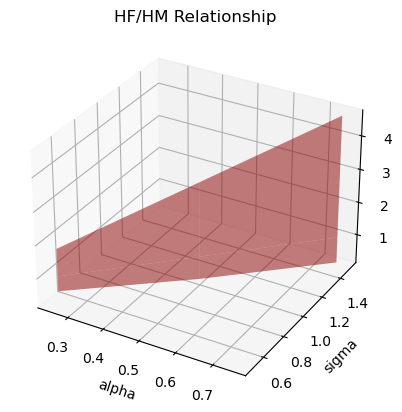

In [2]:
# code for solving the model (remember documentation and comments)

d_solve = model.solve_discrete(do_print=True)
model.solve_discrete()

#Print LM and HM values for the initial values of alpha and sigma
print(f'HF: {d_solve.HF} for alpha and sigma: {model.par.alpha, model.par.sigma}')
print(f'HM: {d_solve.HM} for alpha and sigma: {model.par.alpha, model.par.sigma}')

#Set relationship between HM and HF
forhold_HF_HM = d_solve.HF/d_solve.HM

print(f'The relationship between HF and HM is: {forhold_HF_HM}')

#Set up Alpha and Sigma vectors to use in 3D plot later
alpha_vec = [0.25,0.5,0.75]
sigma_vec = [0.5,1.0,1.5]
v = np.zeros([3,3])

#Create a loop for the Alpha's and Sigmas to take new values
for it, alpha in enumerate(alpha_vec):
    model.par.alpha = alpha
    for jt, sigma in enumerate(sigma_vec):
        model.par.sigma = sigma
        #Print the values to see if they add up
        print(model.par.alpha,model.par.sigma)
        out = model.solve_discrete()
        v[it,jt] = out.HF/out.HM
 
 

fig = plt.figure() # create the figure
ax = fig.add_subplot(1,1,1,projection='3d') # create a 3d type axis 
ax.plot_surface(np.array(alpha_vec),np.array(sigma_vec),v, alpha = 0.5, color = "red"); #Plots figure

#Set labels
ax.set_xlabel('alpha')
ax.set_ylabel('sigma')
ax.set_title("HF/HM Relationship")
plt.show()

In [3]:
#v is the 3x3 vector of the HF/HM relationship with the different values of alpha and sigma
print(v)
print(alpha_vec, sigma_vec)

[[0.54545455 0.30769231 0.21428571]
 [1.         1.         1.        ]
 [1.83333333 3.25       4.66666667]]
[0.25, 0.5, 0.75] [0.5, 1.0, 1.5]


We see that the relationship is equal to 1 when alpha = 0.5 and sigma varies between 0.5 to 1.5

# Question 2

Explain your code and procedure

In [4]:
# code
#First we create Log(HF/HM)
log_forhold_HF_HM = np.log(forhold_HF_HM)

#Next we create the relationship between the wages, WF and WM
forhold_WF_WM = model.par.wF/model.par.wM
#Then we create the log(WF/WM)
log_forhold_WF_WM = np.log(forhold_WF_WM)

#Now we define the vector of values for WF
WF_vec = model.par.wF_vec


# Question 3

Explain your code and procedure

In [5]:
# code

ADD CONCISE CONLUSION.